## 1) Background

In this notebook, we classify digit and goal with our own network architecture (shown in Figure 1 in our paper and coded in define_model.py in this directory). During the test process, we use contrastive excitation backprop (c-EB) triggered by a goal in either parity or magnitude goal class to highlight related pixels and predict the goal digit in each noisy MNIST pair. 

The two digits of each test pair have the opposite goals in both parity and magnitude goal classes, whereas the limitation does not apply to the training pairs. 

We have modified the PyTorch implementation of EB and c-EB by Sam Greydanus (https://github.com/greydanus/excitationbp/). The code script utils.py in the current directory was modified from his package based on our own network architecture. The two code scripts including *\__*init*\__*.py in the current directory and eb_linear.py in the subdirectory called functions were directly from his package. All the rest code scripts (including load_mnist_data_pair.py, define_model.py, predict_w_cEB.py, train_n_test_model.py, show_cEB_results.py, and regulate_MNIST_pair_uncertainty.py) and two ipython notebook files (including train_n_test_results.ipynb and neuromodulated_goal_driven_perception_results.ipynb) in this entire folder were written completely by us for this project. 

For an in-depth explanation of EB and c-EB, refer to [this paper](https://arxiv.org/abs/1608.00507). Their [original code](https://github.com/jimmie33/Caffe-ExcitationBP) of EB and c-EB is in Caffe.

This ipython notebook was completely written by us, who are anonymous authors of the submitted paper under review.

In [1]:
import torch
import numpy as np
import os, sys, copy ; sys.path.append('..')
from train_n_test_model import train_model
from predict_w_cEB import get_each_ceb_accuracy
from show_cEB_results import print_all_overall_stats, show_cEB_example

reseed = lambda: np.random.seed(seed=1) ; ms = torch.manual_seed(1) # for reproducibility
reseed()

if torch.cuda.is_available():
    useCuda = True
else:
    useCuda = False

print(useCuda)

True


## 2) Train the model

In [2]:
model, dataloader = train_model(total_steps = 4400,test_every = 200,test_pair_num = 2000, toTest = True)


Start to train 4400 steps, each with 256 all-combination pairs.
Test every 200 steps with 2000 opposite-property pairs.
step 0/4400 | loss: 0.0739
[even] "digit" acc: 0.100, lbl prob: 0.100, pred prob: 0.106 | "even" acc: 0.531, lbl prob: 0.501, pred prob: 0.503
[odd] "digit" acc: 0.080, lbl prob: 0.100, pred prob: 0.106 | "odd" acc: 1.000, lbl prob: 0.517, pred prob: 0.517
[low] "digit" acc: 0.191, lbl prob: 0.101, pred prob: 0.105 | "low" acc: 1.000, lbl prob: 0.527, pred prob: 0.527
[high] "digit" acc: 0.000, lbl prob: 0.098, pred prob: 0.105 | "high" acc: 0.008, lbl prob: 0.490, pred prob: 0.510
--------------------------------------------------------------------
step 200/4400 | loss: 2.7931
[even] "digit" acc: 0.263, lbl prob: 0.275, pred prob: 0.790 | "even" acc: 1.000, lbl prob: 0.955, pred prob: 0.955
[odd] "digit" acc: 0.366, lbl prob: 0.333, pred prob: 0.698 | "odd" acc: 1.000, lbl prob: 0.959, pred prob: 0.959
[low] "digit" acc: 0.615, lbl prob: 0.463, pred prob: 0.594 | "lo

step 3000/4400 | loss: 0.6283
[even] "digit" acc: 0.924, lbl prob: 0.903, pred prob: 0.950 | "even" acc: 0.996, lbl prob: 0.992, pred prob: 0.994
[odd] "digit" acc: 0.902, lbl prob: 0.866, pred prob: 0.919 | "odd" acc: 0.999, lbl prob: 0.998, pred prob: 0.998
[low] "digit" acc: 0.955, lbl prob: 0.938, pred prob: 0.968 | "low" acc: 0.994, lbl prob: 0.991, pred prob: 0.994
[high] "digit" acc: 0.860, lbl prob: 0.832, pred prob: 0.915 | "high" acc: 0.986, lbl prob: 0.973, pred prob: 0.981
--------------------------------------------------------------------
step 3200/4400 | loss: 0.5766
[even] "digit" acc: 0.931, lbl prob: 0.909, pred prob: 0.948 | "even" acc: 0.997, lbl prob: 0.992, pred prob: 0.994
[odd] "digit" acc: 0.870, lbl prob: 0.849, pred prob: 0.931 | "odd" acc: 0.997, lbl prob: 0.995, pred prob: 0.996
[low] "digit" acc: 0.948, lbl prob: 0.933, pred prob: 0.964 | "low" acc: 0.996, lbl prob: 0.994, pred prob: 0.995
[high] "digit" acc: 0.843, lbl prob: 0.817, pred prob: 0.914 | "hig

## 3) Test on 10,000 pairs of noisy MNIST digits

In [3]:
model_copy = copy.deepcopy(model)
even_avg_stats, odd_avg_stats, low_avg_stats, high_avg_stats, pair_amount, all_X, all_y, all_p, all_hl = get_each_ceb_accuracy(model_copy, dataloader, pair_num=10000)

In [4]:
print_all_overall_stats(even_avg_stats, odd_avg_stats, low_avg_stats, high_avg_stats, pair_amount)


[Statistics by using only even-goal-directed c-EB]: 
   Target Side: correct digit prediction: 9203/10000 pairs | correct even prediction: 9950/10000 pairs
   Target Side: labeled digit certainty: 89.931% | labeled even certainty: 99.200%
   Target Side: predicted digit certainty: 94.734% | predicted even certainty: 99.455%
   Nontarget Side: predicted digit certainty: 49.735% | predicted even certainty: 70.070%

***********************************************************************************

[Statistics by using only odd-goal-directed c-EB]: 
   Target Side: correct digit prediction: 9115/10000 pairs | correct odd prediction: 9975/10000 pairs
   Target Side: labeled digit certainty: 88.906% | labeled odd certainty: 99.594%
   Target Side: predicted digit certainty: 94.149% | predicted odd certainty: 99.714%
   Nontarget Side: predicted digit certainty: 50.727% | predicted odd certainty: 79.715%

***********************************************************************************

[

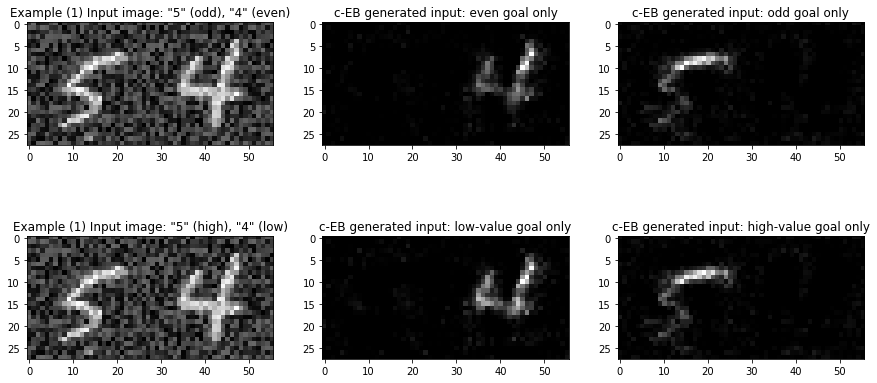

{The Even Goal Result}: 
   Target Side: digit prediction is correct | even prediction is correct | low prediction is correct
   Target Side: lbl digit: 4 | lbl parity: even | lbl highlow: low
   Target Side: lbl digit certainty: 99.618% | lbl parity certainty: 99.918% | lbl high/low certainty: 99.895%
   Target Side: pred digit: 4 | pred parity: even | pred highlow: low
   Target Side: pred digit certainty: 99.618% | pred parity certainty: 99.918% | pred high/low certainty: 99.895%
   Nontarget Side: pred digit: 7 | pred parity: odd | pred highlow: low
   Nontarget Side: pred digit certainty: 34.898% | pred parity certainty: 66.819% | pred high/low certainty: 59.870%

{The Odd Goal Result}: 
   Target Side: digit prediction is correct | odd prediction is correct | high prediction is correct
   Target Side: lbl digit: 5 | lbl parity: odd | lbl highlow: high
   Target Side: lbl digit certainty: 99.999% | lbl parity certainty: 100.000% | lbl high/low certainty: 99.997%
   Target Side: pr

In [5]:
# Example (1)
model_copy = copy.deepcopy(model)
show_cEB_example(all_X,all_y,all_p,all_hl,model_copy,70,1) 


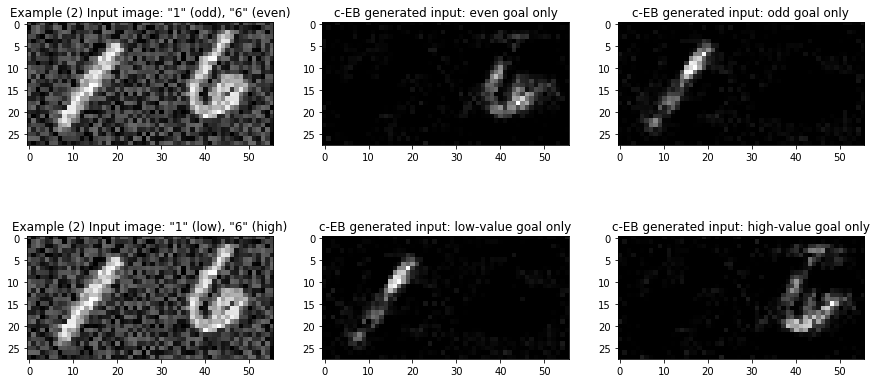

{The Even Goal Result}: 
   Target Side: digit prediction is correct | even prediction is correct | low prediction is correct
   Target Side: lbl digit: 6 | lbl parity: even | lbl highlow: high
   Target Side: lbl digit certainty: 99.135% | lbl parity certainty: 99.980% | lbl high/low certainty: 99.934%
   Target Side: pred digit: 6 | pred parity: even | pred highlow: high
   Target Side: pred digit certainty: 99.135% | pred parity certainty: 99.980% | pred high/low certainty: 99.934%
   Nontarget Side: pred digit: 5 | pred parity: odd | pred highlow: low
   Nontarget Side: pred digit certainty: 48.335% | pred parity certainty: 77.259% | pred high/low certainty: 56.597%

{The Odd Goal Result}: 
   Target Side: digit prediction is correct | odd prediction is correct | high prediction is correct
   Target Side: lbl digit: 1 | lbl parity: odd | lbl highlow: low
   Target Side: lbl digit certainty: 99.998% | lbl parity certainty: 99.999% | lbl high/low certainty: 99.979%
   Target Side: pr

In [6]:
# Example (2)
model_copy = copy.deepcopy(model)
show_cEB_example(all_X,all_y,all_p,all_hl,model_copy,840,2) 


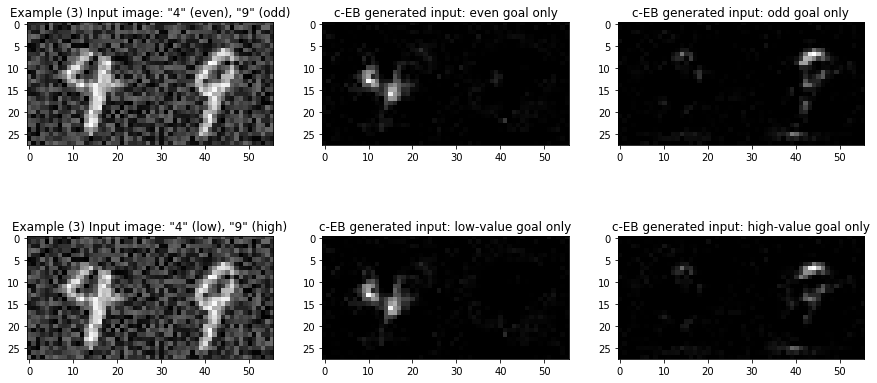

{The Even Goal Result}: 
   Target Side: digit prediction is correct | even prediction is correct | low prediction is correct
   Target Side: lbl digit: 4 | lbl parity: even | lbl highlow: low
   Target Side: lbl digit certainty: 99.971% | lbl parity certainty: 99.998% | lbl high/low certainty: 99.999%
   Target Side: pred digit: 4 | pred parity: even | pred highlow: low
   Target Side: pred digit certainty: 99.971% | pred parity certainty: 99.998% | pred high/low certainty: 99.999%
   Nontarget Side: pred digit: 8 | pred parity: even | pred highlow: high
   Nontarget Side: pred digit certainty: 47.518% | pred parity certainty: 80.815% | pred high/low certainty: 86.490%

{The Odd Goal Result}: 
   Target Side: digit prediction is correct | odd prediction is correct | high prediction is correct
   Target Side: lbl digit: 9 | lbl parity: odd | lbl highlow: high
   Target Side: lbl digit certainty: 69.119% | lbl parity certainty: 99.869% | lbl high/low certainty: 80.365%
   Target Side: p

In [7]:
# Example 3
model_copy = copy.deepcopy(model)
show_cEB_example(all_X,all_y,all_p,all_hl,model_copy,5550,3)


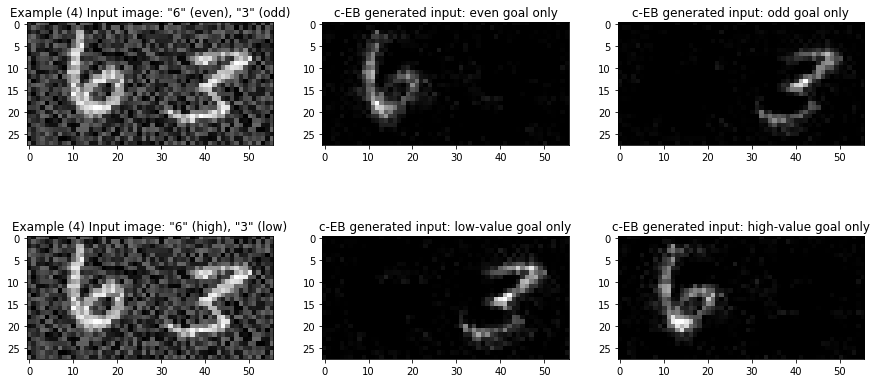

{The Even Goal Result}: 
   Target Side: digit prediction is correct | even prediction is correct | low prediction is correct
   Target Side: lbl digit: 6 | lbl parity: even | lbl highlow: high
   Target Side: lbl digit certainty: 99.557% | lbl parity certainty: 99.997% | lbl high/low certainty: 99.997%
   Target Side: pred digit: 6 | pred parity: even | pred highlow: high
   Target Side: pred digit certainty: 99.557% | pred parity certainty: 99.997% | pred high/low certainty: 99.997%
   Nontarget Side: pred digit: 5 | pred parity: odd | pred highlow: high
   Nontarget Side: pred digit certainty: 32.390% | pred parity certainty: 77.903% | pred high/low certainty: 77.316%

{The Odd Goal Result}: 
   Target Side: digit prediction is correct | odd prediction is correct | high prediction is correct
   Target Side: lbl digit: 3 | lbl parity: odd | lbl highlow: low
   Target Side: lbl digit certainty: 97.584% | lbl parity certainty: 100.000% | lbl high/low certainty: 99.974%
   Target Side: 

In [8]:
# Example (4)
model_copy = copy.deepcopy(model)
show_cEB_example(all_X,all_y,all_p,all_hl,model_copy,9999,4)
